### to predict whether the passenger is survived or not
0-not survived
1-survived
sibsp-1-siblingspouse
sibsp-0-notsibspouse
parch-parentchild:0-notparch
parch-parentchild:1-parch
cabin-nan-notanumber(missingvalue)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("titanic-training-data.csv")


In [3]:
df.shape

(891, 12)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### univariate analysis

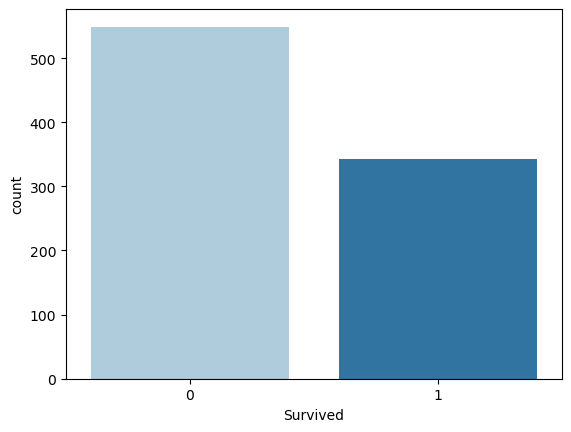

In [12]:
sns.countplot(x="Survived",data=df,palette="Paired")
plt.show()

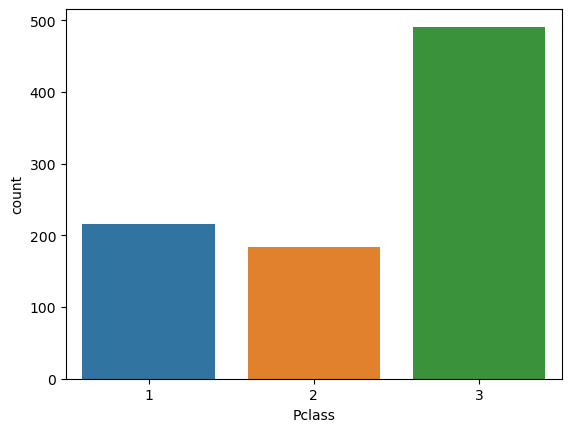

In [10]:
sns.countplot(x="Pclass",data=df)
plt.show()

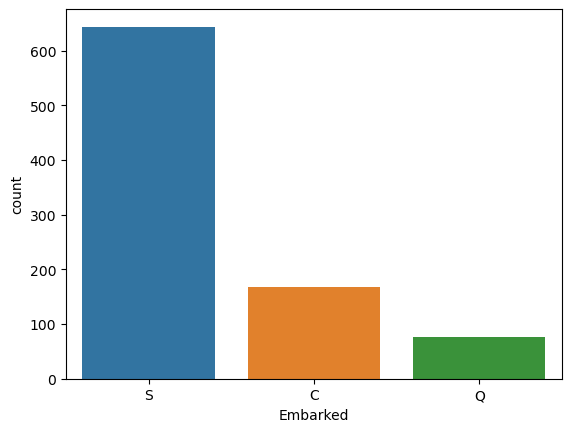

In [13]:
sns.countplot(x="Embarked",data=df)
plt.show()

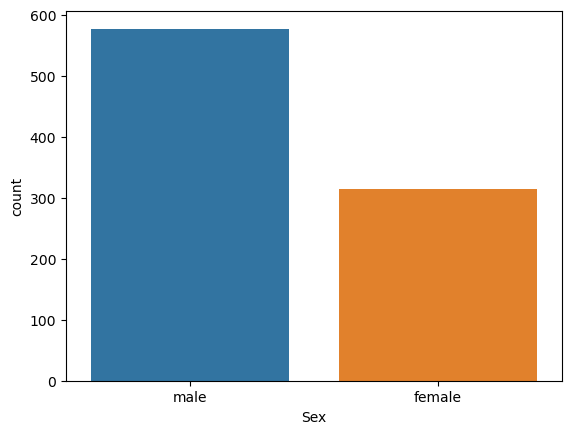

In [14]:
sns.countplot(x="Sex",data=df)
plt.show()

### anylsing numerical attributes

In [15]:
import warnings
warnings.filterwarnings("ignore")

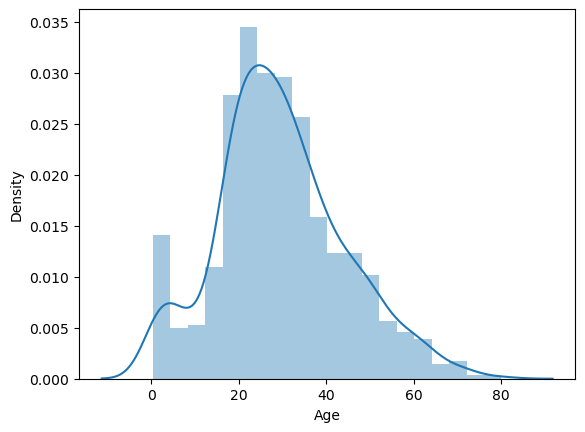

In [16]:
sns.distplot(df["Age"])
plt.show()
## similar for all numericals

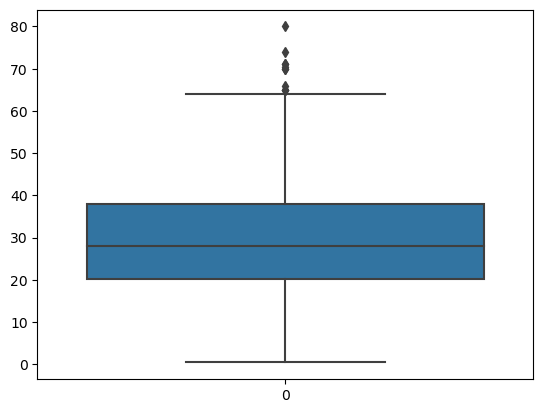

In [17]:
sns.boxplot(df["Age"])
plt.show()
##similar for parent,age,spouse
## with boxplot we will be knowing outliers

### BIVARIATE ANALYSIS

<Axes: xlabel='Sex', ylabel='count'>

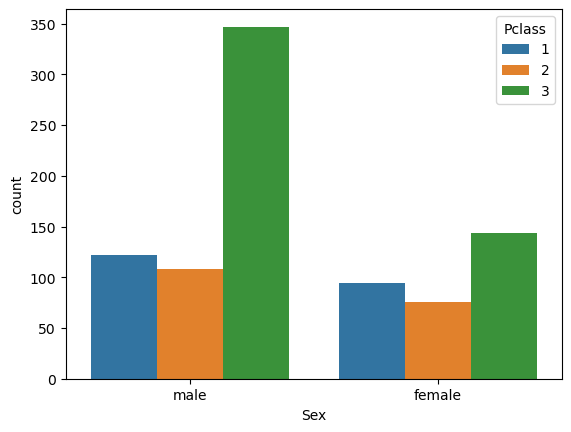

In [18]:
sns.countplot(x="Sex",hue="Pclass",data=df)

<Axes: xlabel='Sex', ylabel='count'>

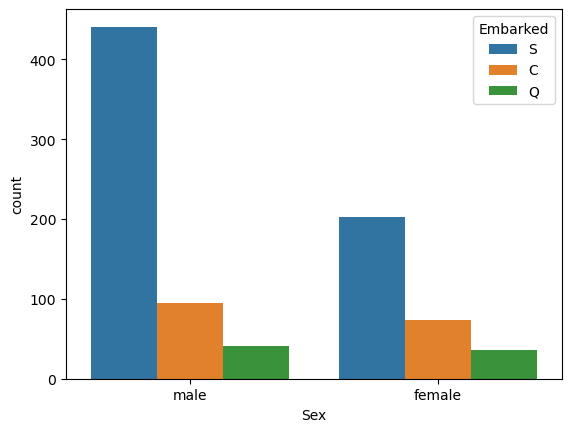

In [19]:
sns.countplot(x="Sex",hue="Embarked",data=df)

<Axes: xlabel='Embarked', ylabel='count'>

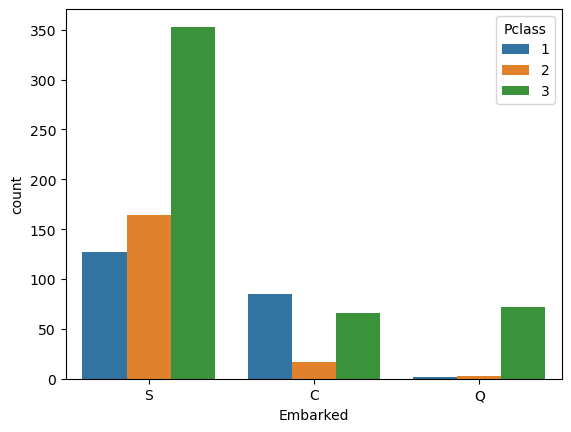

In [20]:
sns.countplot(x="Embarked",hue="Pclass",data=df)

<Axes: xlabel='Pclass', ylabel='Age'>

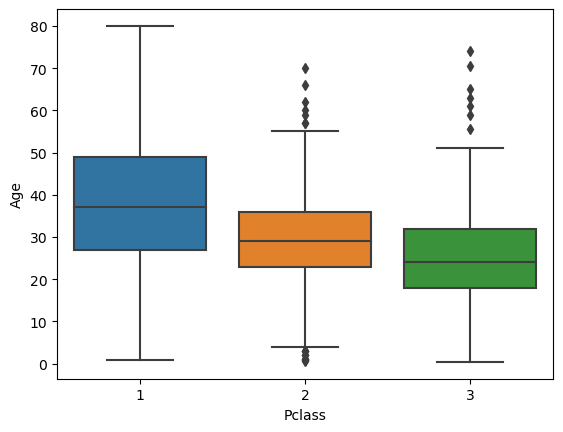

In [21]:
sns.boxplot(x="Pclass",y="Age",data=df)

In [22]:
## 1 cate or 2 catro in both cases u are both 
## 1 num-histo/dist/


<Axes: xlabel='Sex', ylabel='Age'>

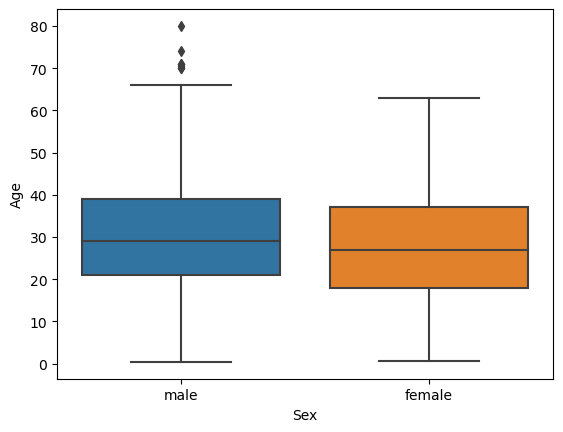

In [23]:
sns.boxplot(x="Sex",y="Age",data=df)

### multivariate analysis
###vilon,swarn

<Axes: xlabel='Sex', ylabel='Age'>

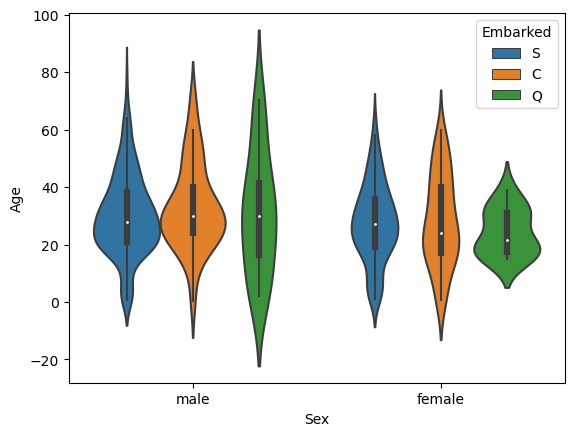

In [25]:
sns.violinplot(x="Sex",y="Age",hue="Embarked",data=df)

In [26]:
sns.Swarnplot(x="Sex",y="Age",hue="Embarked",data=df)

AttributeError: module 'seaborn' has no attribute 'Swarnplot'

In [29]:
df=df.drop(columns=["PassengerId","Ticket","Fare","Name","Cabin"],axis=1)

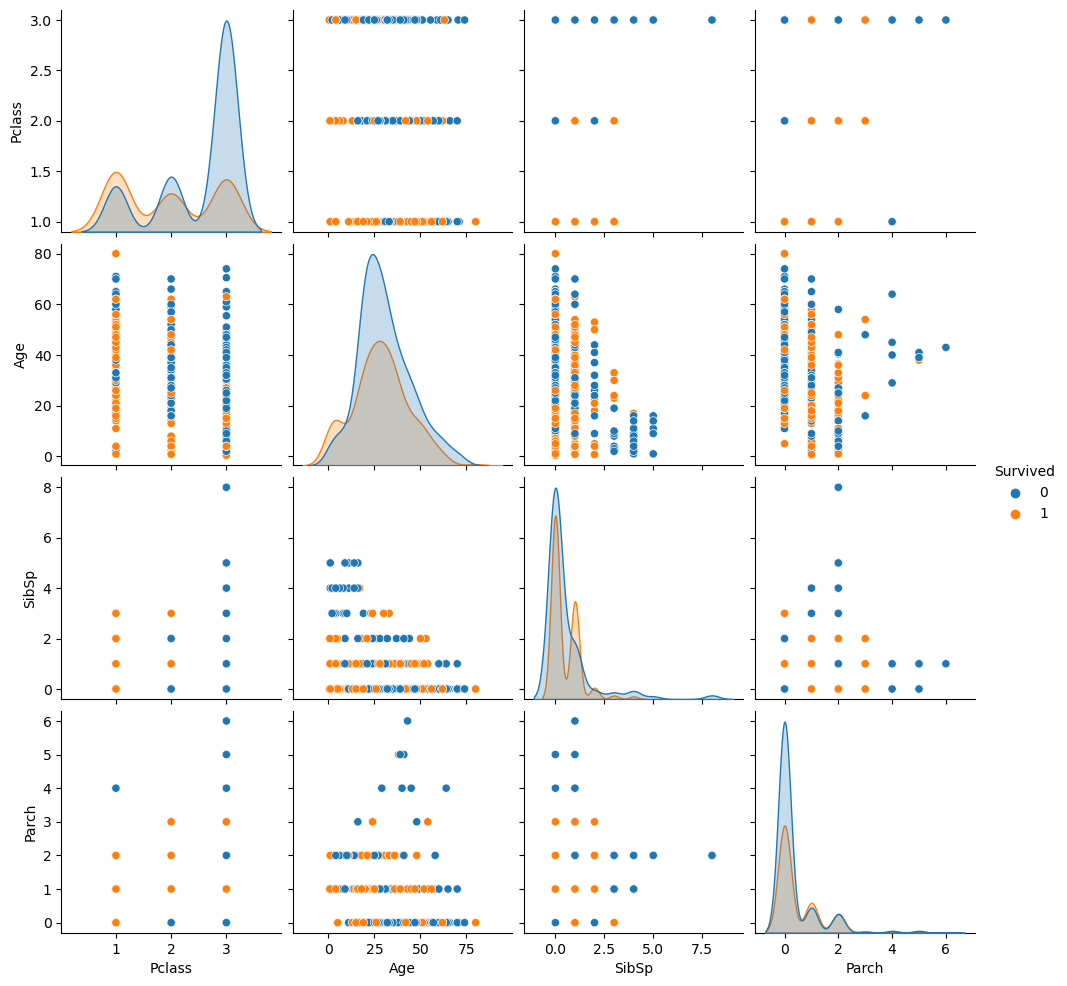

In [30]:
sns.pairplot(df,hue="Survived")

### Outliner Treatment

<Axes: >

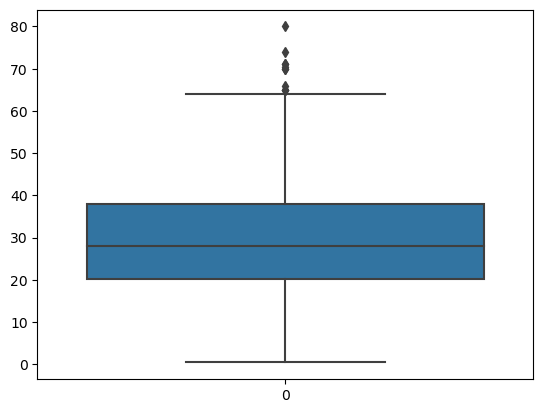

In [31]:
sns.boxplot(df["Age"])

In [32]:
q1=df["Age"].quantile(0.25)
q3=df["Age"].quantile(0.75)
iqr=q3-q1

In [33]:
lower_threshold=q1-1.5*iqr
upper_threshold=q3+1.5*iqr

In [34]:
lower_threshold

-6.6875

In [35]:
upper_threshold


64.8125

In [36]:
df=df[(df["Age"]>=lower_threshold)&(df["Age"]<=upper_threshold)]

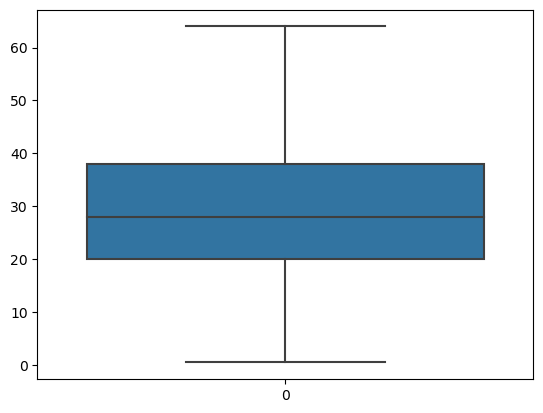

In [37]:
sns.boxplot(df["Age"])
plt.show()

In [38]:
## similar for siblling spouse

<Axes: >

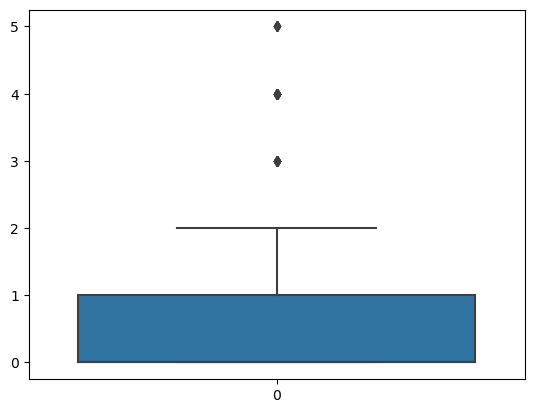

In [39]:
sns.boxplot(df["SibSp"])

In [40]:
q1=df["SibSp"].quantile(0.25)
q3=df["SibSp"].quantile(0.75)
iqr=q3-q1

In [41]:
lower_threshold=q1-1.5*iqr
upper_threshold=q3+1.5*iqr

In [42]:
lower_threshold

-1.5

In [43]:
upper_threshold


2.5

In [45]:
df=df[(df["SibSp"]>=lower_threshold)&(df["SibSp"]<=upper_threshold)]

In [47]:
sns.boxplot(df["SibSp"])
plt.show()

KeyError: 0

In [48]:
### Mising values treatment

In [49]:
median1=df["Age"].median()
df["Age"]=df["Age"].fillna(median1)

In [50]:
mode1=df["Embarked"].mode()[0]
df["Embarked"]=df["Embarked"].fillna(mode1)

In [51]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

### Encoding

In [53]:
df=pd.get_dummies(df,columns=["Sex","Embarked"])

In [54]:
df.dtypes


Survived        int64
Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Sex_female      uint8
Sex_male        uint8
Embarked_C      uint8
Embarked_S      uint8
dtype: object

In [55]:
df.isnull().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_S    0
dtype: int64

### there should not be any data values except 0